Dado un conjunto de n objetos cuyos tamaños son {T1, T2,··· , Tn}, con Ti ∈ (0,1], se debe empaquetarlos usando la mínima cantidad de envases de capacidad 1. 

Solución por backtracking/fuerza bruta.

In [1]:
# to use deepcopy
from copy import deepcopy
from math import inf

def _empaquetar_back(items, paquetes, tabs=0, len_min=inf):
    if len(items) == 0:
        # print("\t"*tabs, "items:", items)
        # print("\t"*tabs, "paquetes:", paquetes)
        return paquetes
    
    # tomamos el primer item
    item = items.pop(0)

    # agrego un nuevo paquete
    if paquetes == []:
        paquetes.append([item])
        return _empaquetar_back(items.copy(), deepcopy(paquetes), tabs+1)

    # hay que empaquetar el item
    # puede ser en un paquete existente
    # o en un paquete nuevo
    opciones = []
    # print("\t"*tabs, "item:", item)
    # print("\t"*tabs, "paquetes:", paquetes)
    for i in range(len(paquetes)):
        if sum(paquetes[i]) + item <= 1:
            paquetes_copia = deepcopy(paquetes)
            paquetes_copia[i].append(item)
            opcion = _empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min)
            if len(opcion) < len_min:
               len_min = len(opcion)
               opciones = [opcion]

    
    if len(opciones) + 1 <= len_min:
        paquetes_copia = deepcopy(paquetes)
        paquetes_copia.append([item])
        opciones.append(_empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min))
                
    # print("\t"*tabs, "opciones:", opciones)
    min = opciones[0]

    for opcion in opciones:
        if len(opcion) < len(min):
            min = opcion

    # print("\t"*tabs, "min:", min)

    return min
            
def empaquetar_back(items):
    paquetes = []
    return _empaquetar_back(items.copy(), paquetes)

In [2]:
items =  [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_back(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_back(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.4, 0.5, 0.1], [0.8, 0.2], [0.7, 0.1, 0.2], [0.6, 0.4]]


Complejidad:
Hay que hacer todas las combinaciones posibles de items, a pesar de hacer cortes en el arbol de decisiones, la complejidad es exponencial.
Siendo 

Creamos una función que genere sets para hacer las mediciones.

In [3]:
from random import uniform

def generador_items(n):
    return [round(uniform(0.01, 1.00), 2) for _ in range(n)]

In [4]:
import time

tiempos = {}
for i in range(0, 10, 5):
    items = generador_items(i)
    start = time.time()
    paquetes = empaquetar_back(items)
    end = time.time()
    tiempos[i] = end - start

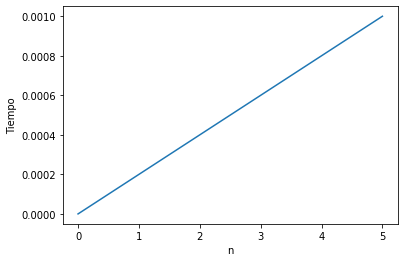

In [5]:
from matplotlib import pyplot as plt

plt.plot(tiempos.keys(), tiempos.values())
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.show()

Algoritmo de aproximación:  
1. Se abre el primer envase y se empaqueta el primer objeto.  
2. Por cada uno de los objetos restantes se prueba si cabe en el envase actual que está abierto.  
a. Si es así, se lo agrega a dicho envase, y se sigue con el siguiente objeto.  
b. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se empaqueta el objeto y se prosigue con el siguiente.  


In [6]:
def empaquetar_aprox(items):
    paquetes = []
    paquete_actual = []
    for item in items:
        if round(sum(paquete_actual) + item, 3) <= 1:
            paquete_actual.append(item)
        else:
            paquetes.append(paquete_actual)
            paquete_actual = [item]
    paquetes.append(paquete_actual)
    return paquetes

In [7]:
items =  [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_aprox(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_aprox(items))

[[0.5, 0.4], [0.3, 0.2, 0.1]]
[[0.4], [0.8], [0.5, 0.1], [0.7], [0.6, 0.1], [0.4, 0.2, 0.2]]


Complejidad:  
La complejidad de este algoritmo es O(n), ya que recorre todos los items y asigna cada uno a un envase sin hacer (lo cual es O(1)).

In [8]:
import time

tiempos = {}
for i in range(0, 1000, 5):
    items = generador_items(i)
    start = time.time()
    paquetes = empaquetar_aprox(items)
    end = time.time()
    tiempos[i] = end - start

In [9]:
from matplotlib import pyplot as plt

# plt.plot(tiempos.keys(), tiempos.values())
# plt.xlabel('n')
# plt.ylabel('Tiempo')
# plt.show()

Implementar alguna otra aproximación (u algoritmo greedy) que les parezca de interés. Comparar sus resultados con los dados por la aproximación del punto 3. Indicar y justificar su complejidad.

In [10]:
def empaquetar_greedy(items):
    #ordenamos los items de mayor a menor
    items.sort(reverse=True)
    paquetes = []

    for item in items:
        
        # si no hay paquetes creo el primero
        if paquetes == []:
            paquetes.append([item])
            continue

        # itero sobre los paquetes
        agregado = False
        for i in range(len(paquetes)):
            # si el item entra en el paquete
            if round(sum(paquetes[i]) + item, 3) <= 1:
                paquetes[i].append(item)
                agregado = True
                break

        # si no entra en ningun paquete
        if not agregado:
            paquetes.append([item])
            
    return paquetes

In [11]:
items =  [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_greedy(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_greedy(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4], [0.5, 0.4, 0.1]]


In [12]:
items1 = generador_items(5)
items2 = generador_items(10)
items3 = generador_items(15)

back1 = empaquetar_back(items1)
back2 = empaquetar_back(items2)
back3 = empaquetar_back(items3)

aprox1 = empaquetar_aprox(items1)
aprox2 = empaquetar_aprox(items2)
aprox3 = empaquetar_aprox(items3)

greedy1 = empaquetar_greedy(items1)
greedy2 = empaquetar_greedy(items2)
greedy3 = empaquetar_greedy(items3)

In [13]:
print("Para 5 items:")
print(f"Backtracking -> {len(back1)} paquetes -> {back1}")
print(f"Sumas paquetes back -> {[sum(p) for p in back1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back1])}")
print(f"Aproximacion -> {len(aprox1)} paquetes -> {aprox1}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox1])}")
print(f"Greedy -> {len(greedy1)} paquetes -> {greedy1}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy1])}\n")

print("Para 10 items:")
print(f"Backtracking -> {len(back2)} paquetes -> {back2}")
print(f"sumas paquetes back -> {[sum(p) for p in back2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back2])}")
print(f"Aproximacion -> {len(aprox2)} paquetes -> {aprox2}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox2])}")
print(f"Greedy -> {len(greedy2)} paquetes -> {greedy2}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy2])}\n")

print("Para 15 items:")
print(f"Backtracking -> {len(back3)} paquetes -> {back3}")
print(f"sumas paquetes back -> {[sum(p) for p in back3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back3])}")
print(f"Aproximacion -> {len(aprox3)} paquetes -> {aprox3}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox3])}")
print(f"Greedy -> {len(greedy3)} paquetes -> {greedy3}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy3])}\n")

Para 5 items:
Backtracking -> 2 paquetes -> [[0.22, 0.28, 0.24, 0.17], [0.58]]
Sumas paquetes back -> [0.91, 0.58]
Algun paquete tiene un valor mayor que 1 -> [False, False]
Cantidad de elementos totales -> 5
Aproximacion -> 2 paquetes -> [[0.22, 0.28, 0.24, 0.17], [0.58]]
Sumas paquetes aprox -> [0.91, 0.58]
Algun paquete tiene un valor mayor que 1 -> [False, False]
Cantidad de elementos totales -> 5
Greedy -> 2 paquetes -> [[0.58, 0.28], [0.24, 0.22, 0.17]]
Sumas paquetes greedy -> [0.86, 0.63]
Algun paquete tiene un valor mayor que 1 -> [False, False]
Cantidad de elementos totales -> 5

Para 10 items:
Backtracking -> 6 paquetes -> [[0.34, 0.49], [0.28, 0.67], [0.94], [0.2, 0.66], [0.42, 0.47], [0.83]]
sumas paquetes back -> [0.8300000000000001, 0.9500000000000001, 0.94, 0.8600000000000001, 0.8899999999999999, 0.83]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False, False]
Cantidad de elementos totales -> 10
Aproximacion -> 8 paquetes -> [[0.34, 0.49], [0

In [14]:
for i in range(10, 5000, 50):
    items = generador_items(i)
    aprox = empaquetar_aprox(items)
    greedy = empaquetar_greedy(items)
    print(f"Para {i} items:")
    print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
    print(f"Greedy -> {len(greedy)} paquetes -> {greedy}\n")

Para 10 items:
Aproximacion -> 9 paquetes -> [[0.99], [0.88], [0.91], [0.46], [0.75], [0.74], [0.81, 0.12], [0.57], [0.48]]
Greedy -> 8 paquetes -> [[0.99], [0.91], [0.88, 0.12], [0.81], [0.75], [0.74], [0.57], [0.48, 0.46]]

Para 60 items:
Aproximacion -> 37 paquetes -> [[0.73], [0.48, 0.33], [0.71], [0.82], [0.25, 0.28, 0.18], [0.54], [0.7, 0.27], [0.75], [0.58], [0.6], [0.53], [0.94], [0.76, 0.14], [0.35], [0.85, 0.1], [0.74, 0.25], [0.84, 0.02], [0.54, 0.14, 0.21], [0.35, 0.4], [0.26, 0.47], [0.58], [0.51, 0.33, 0.08], [0.63, 0.14, 0.12, 0.06], [0.14, 0.12], [0.8], [1.0], [0.34], [0.99], [0.11, 0.57, 0.11, 0.03], [0.94], [0.66], [0.96], [0.83], [0.3, 0.59], [0.64], [0.54, 0.22], [0.57]]
Greedy -> 30 paquetes -> [[1.0], [0.99], [0.96, 0.03], [0.94, 0.06], [0.94, 0.02], [0.85, 0.14], [0.84, 0.14], [0.83, 0.14], [0.82, 0.18], [0.8, 0.14], [0.76, 0.22], [0.75, 0.25], [0.74, 0.26], [0.73, 0.27], [0.71, 0.28], [0.7, 0.3], [0.66, 0.34], [0.64, 0.35], [0.63, 0.35], [0.6, 0.4], [0.59, 0.33,

In [15]:
items = [0.69, 0.22, 0.08, 0.62, 0.18, 0.18, 0.59, 0.4, 0.49, 0.49]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")


Para 10 items:
Backtracking -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes back -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes aprox -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10



In [17]:
items = [0.08, 0.22, 0.49, 0.18, 0.4, 0.59, 0.49, 0.69, 0.18, 0.62]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")

Para 10 items:
Backtracking -> 4 paquetes -> [[0.08, 0.22, 0.69], [0.49, 0.49], [0.18, 0.18, 0.62], [0.4, 0.59]]
Sumas paquetes back -> [0.99, 0.98, 0.98, 0.99]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 5 paquetes -> [[0.08, 0.22, 0.49, 0.18], [0.4, 0.59], [0.49], [0.69, 0.18], [0.62]]
Sumas paquetes aprox -> [0.97, 0.99, 0.49, 0.8699999999999999, 0.62]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

